In [10]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from retrosheet_controller import RetroSheetDataController
from retrosheet_util import RetroSheetUtil
from analyze_batter import AnalyzeBatter
import matplotlib.pyplot as plt

In [11]:
# Joey Votto VS Ichiro Suzukiお散歩対決
client = RetroSheetDataController()
analyzer = AnalyzeBatter()
votto_df_atbat, ichiro_df_atbat = {}, {}
votto_df_walks, ichiro_df_walks = {}, {}
for year in range(2014, 2015): # 2009-2014シーズンまでが対象
    votto_df_atbat[year] = client.batter_event_by_at_bat('Joey', 'Votto', year)
    votto_df_walks[year] = client.batter_event_by_walk('Joey', 'Votto', year)
    ichiro_df_atbat[year] = client.batter_event_by_at_bat('Ichiro', 'Suzuki', year)
    ichiro_df_walks[year] = client.batter_event_by_walk('Ichiro', 'Suzuki', year)


In [12]:
# ボットVSイチローの年間四球数(月ごと&Total)
 
graph_data_list = {}
for df_walks in (
    {"name": "Joey Votto", "data": votto_df_walks}, 
    {"name": "Ichiro Suzuki", "data": ichiro_df_walks},
):
    graph_data = {}
    for year, walks in df_walks["data"].items():
        monthly_walks, walk_counts = analyzer.monthly_walks(walks)
        graph_data["{year}({ball})".format(year=year, ball=walk_counts)] = monthly_walks 
    df = pd.DataFrame(graph_data)
    graph_data_list[df_walks['name']] = df


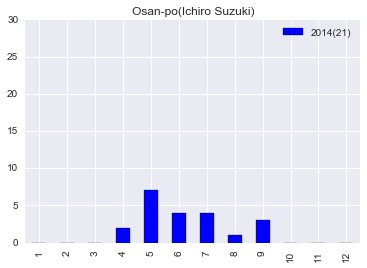

In [13]:
# Ichiro Suzuki
graph_data_list['Ichiro Suzuki'].plot(kind='bar', ylim=(0, 30), title='Osan-po({name})'.format(name='Ichiro Suzuki'))


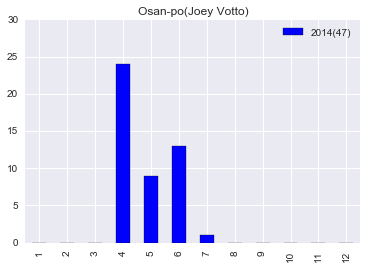

In [14]:
# Joey Votto
graph_data_list['Joey Votto'].plot(kind='bar', ylim=(0, 30), title='Osan-po({name})'.format(name='Joey Votto'))


In [8]:
# ボットVSイチローのマルチ散歩対決(月ごと&Total)
 
graph_data_list = {}
for df_walks in (
    {"name": "Joey Votto", "data": votto_df_walks}, 
    {"name": "Ichiro Suzuki", "data": ichiro_df_walks},
):
    graph_data = {}
    for year, walks in df_walks["data"].items():
        monthly_walks, walk_counts = analyzer.monthly_walks_multi(walks)
        graph_data["{year}({ball})".format(year=year, ball=walk_counts)] = monthly_walks 
    df = pd.DataFrame(graph_data)
    graph_data_list[df_walks['name']] = df


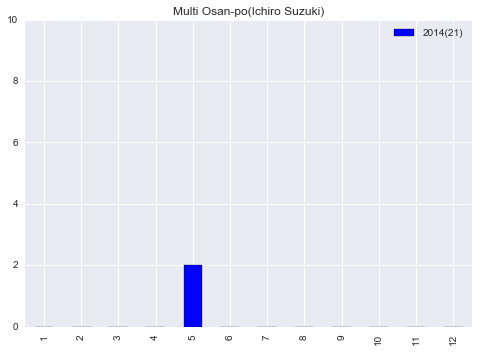

In [9]:
# Ichiro Suzuki
graph_data_list['Ichiro Suzuki'].plot(kind='bar', ylim=(0, 10), title='Multi Osan-po({name})'.format(name='Ichiro Suzuki'))


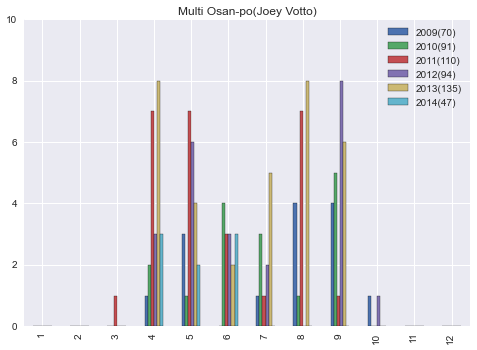

In [8]:
# Joey Votto
graph_data_list['Joey Votto'].plot(kind='bar', ylim=(0, 10), title='Multi Osan-po({name})'.format(name='Joey Votto'))


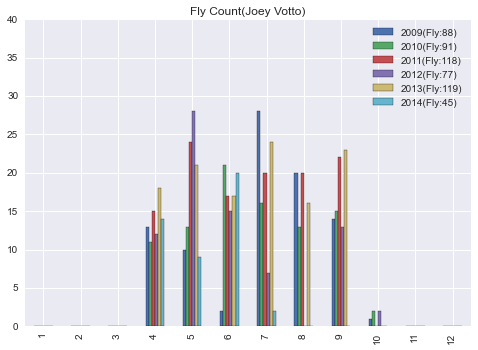

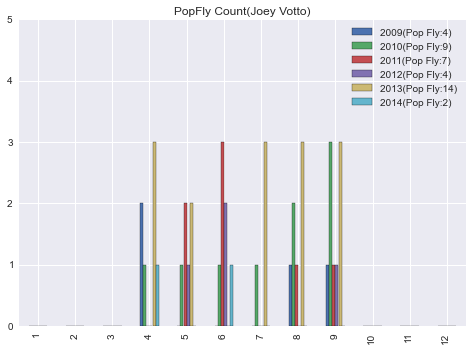

In [19]:
# ボットさんの内野のポップフライ数を数える
fly, pop_fly = {}, {}

for year, atbat in votto_df_atbat.items():
    monthly_fly = analyzer._monthly_counts()
    monthly_pop = analyzer._monthly_counts()
    fly_cnt, pop_cnt = 0, 0
    for i, row in atbat.iterrows():
        month =  int(str(row['game_dt'])[4:6])
        # フライっぽいアウト（と思われる）打球をカウント
        # event cdがアウトかつ、batted ballがラインドライブかフライ
        if row['event_cd'] == 2 and row['battedball_cd'] in ('L', 'F'):
            monthly_fly[month] += 1
            fly_cnt += 1
            # 内野に上がったフライの数
            if int(row['event_tx'][0:1]) < 7:
                monthly_pop[month] += 1
                pop_cnt += 1
    fly["{year}(Fly:{cnt})".format(year=year, cnt=fly_cnt)] = monthly_fly
    pop_fly["{year}(Pop Fly:{cnt})".format(year=year, cnt=pop_cnt)] = monthly_pop
            
df = pd.DataFrame(fly)
df.plot(kind='bar', ylim=(0, 40), title='Fly Count({name})'.format(name='Joey Votto'))
df = pd.DataFrame(pop_fly)
df.plot(kind='bar', ylim=(0, 5), title='PopFly Count({name})'.format(name='Joey Votto'))
